In [1]:
%matplotlib inline

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

from tensorflow.keras.datasets.mnist import load_data

# Introduction to NNs

In [3]:
logistic_regression = LogisticRegression()

In [4]:
log_regressors = [logistic_regression for _ in range(20)]

In [5]:
log_regressors

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [6]:
log_regressors = [(f"log_regs_{i}", logistic_regression) for i in range(20)]

In [7]:
VotingClassifier(log_regressors)

VotingClassifier(estimators=[('log_regs_0', LogisticRegression()),
                             ('log_regs_1', LogisticRegression()),
                             ('log_regs_2', LogisticRegression()),
                             ('log_regs_3', LogisticRegression()),
                             ('log_regs_4', LogisticRegression()),
                             ('log_regs_5', LogisticRegression()),
                             ('log_regs_6', LogisticRegression()),
                             ('log_regs_7', LogisticRegression()),
                             ('log_regs_8', LogisticRegression(...
                             ('log_regs_10', LogisticRegression()),
                             ('log_regs_11', LogisticRegression()),
                             ('log_regs_12', LogisticRegression()),
                             ('log_regs_13', LogisticRegression()),
                             ('log_regs_14', LogisticRegression()),
                             ('log_regs_15', LogisticRegression()),
                             ('log_regs_16', LogisticRegression()),
                             ('log_regs_17', LogisticRegression()),
                             ('log_regs_18', LogisticRegression()),
                             ('log_regs_19', LogisticRegression())])

However, all regresions will do the same.

In [8]:
voting = VotingClassifier(log_regressors)

In [9]:
[(f"voting_{i}", VotingClassifier(log_regressors)) for i in range(4)]

[('voting_0',
  VotingClassifier(estimators=[('log_regs_0', LogisticRegression()),
                               ('log_regs_1', LogisticRegression()),
                               ('log_regs_2', LogisticRegression()),
                               ('log_regs_3', LogisticRegression()),
                               ('log_regs_4', LogisticRegression()),
                               ('log_regs_5', LogisticRegression()),
                               ('log_regs_6', LogisticRegression()),
                               ('log_regs_7', LogisticRegression()),
                               ('log_regs_8', LogisticRegression(...
                               ('log_regs_10', LogisticRegression()),
                               ('log_regs_11', LogisticRegression()),
                               ('log_regs_12', LogisticRegression()),
                               ('log_regs_13', LogisticRegression()),
                               ('log_regs_14', LogisticRegression()),
               

In [10]:
voting_classifiers = [(f"voting_{i}", VotingClassifier(log_regressors)) for i in range(5)]

In [11]:
StackingClassifier(voting_classifiers)

StackingClassifier(estimators=[('voting_0',
                                VotingClassifier(estimators=[('log_regs_0',
                                                              LogisticRegression()),
                                                             ('log_regs_1',
                                                              LogisticRegression()),
                                                             ('log_regs_2',
                                                              LogisticRegression()),
                                                             ('log_regs_3',
                                                              LogisticRegression()),
                                                             ('log_regs_4',
                                                              LogisticRegression()),
                                                             ('log_regs_5',
                                                              LogisticRegression()),
                                                             ('log_regs_6',
                                                              LogisticRegression()),
                                                             ('log_regs_7',
                                                              LogisticRegr...
                                                              LogisticRegression()),
                                                             ('log_regs_11',
                                                              LogisticRegression()),
                                                             ('log_regs_12',
                                                              LogisticRegression()),
                                                             ('log_regs_13',
                                                              LogisticRegression()),
                                                             ('log_regs_14',
                                                              LogisticRegression()),
                                                             ('log_regs_15',
                                                              LogisticRegression()),
                                                             ('log_regs_16',
                                                              LogisticRegression()),
                                                             ('log_regs_17',
                                                              LogisticRegression()),
                                                             ('log_regs_18',
                                                              LogisticRegression()),
                                                             ('log_regs_19',
                                                              LogisticRegression())]))])

In [12]:
sgd = SGDClassifier(loss = 'hinge')

In [13]:
units = [(f"unit_{i}", sgd) for i in range(20)]

In [14]:
layer = VotingClassifier(units)

In [15]:
layer

VotingClassifier(estimators=[('unit_0', SGDClassifier()),
                             ('unit_1', SGDClassifier()),
                             ('unit_2', SGDClassifier()),
                             ('unit_3', SGDClassifier()),
                             ('unit_4', SGDClassifier()),
                             ('unit_5', SGDClassifier()),
                             ('unit_6', SGDClassifier()),
                             ('unit_7', SGDClassifier()),
                             ('unit_8', SGDClassifier()),
                             ('unit_9', SGDClassifier()),
                             ('unit_10', SGDClassifier()),
                             ('unit_11', SGDClassifier()),
                             ('unit_12', SGDClassifier()),
                             ('unit_13', SGDClassifier()),
                             ('unit_14', SGDClassifier()),
                             ('unit_15', SGDClassifier()),
                             ('unit_16', SGDClassifier()),
                             ('unit_17', SGDClassifier()),
                             ('unit_18', SGDClassifier()),
                             ('unit_19', SGDClassifier())])

In [16]:
nn = [(f"voting_{i}", VotingClassifier(units)) for i in range(5)]

In [17]:
nn

[('voting_0',
  VotingClassifier(estimators=[('unit_0', SGDClassifier()),
                               ('unit_1', SGDClassifier()),
                               ('unit_2', SGDClassifier()),
                               ('unit_3', SGDClassifier()),
                               ('unit_4', SGDClassifier()),
                               ('unit_5', SGDClassifier()),
                               ('unit_6', SGDClassifier()),
                               ('unit_7', SGDClassifier()),
                               ('unit_8', SGDClassifier()),
                               ('unit_9', SGDClassifier()),
                               ('unit_10', SGDClassifier()),
                               ('unit_11', SGDClassifier()),
                               ('unit_12', SGDClassifier()),
                               ('unit_13', SGDClassifier()),
                               ('unit_14', SGDClassifier()),
                               ('unit_15', SGDClassifier()),
                    

<b>NN</b>

In [18]:
real_nn = MLPClassifier(hidden_layer_sizes = (3, 8, 15), max_iter = 5000)

In [19]:
real_nn

MLPClassifier(hidden_layer_sizes=(3, 8, 15), max_iter=5000)

solver -> algorithm for gradient decent

In [20]:
digits = load_digits()

In [21]:
digit_attributes, digit_classes = digits['data'], digits['target']

In [22]:
real_nn.fit(digit_attributes, digit_classes)

MLPClassifier(hidden_layer_sizes=(3, 8, 15), max_iter=5000)

In [23]:
real_nn.coefs_

[array([[-5.56934156e-84,  7.82142537e-67,  2.01132954e-40],
        [-1.20390447e-01,  4.51628691e-46, -2.36644729e-01],
        [ 9.87942751e-02,  3.26181091e-36,  9.19148446e-02],
        [ 2.23827813e-01, -9.84483551e-36,  2.10585693e-01],
        [ 1.40392431e-01, -1.74437560e-02, -5.47254675e-02],
        [ 4.23647414e-03, -1.85411197e-02,  1.98874361e-01],
        [ 5.54023676e-02, -7.92466794e-62, -5.02947504e-02],
        [-8.02758572e-01,  2.88877507e-42, -1.67326806e-01],
        [ 9.02834803e-02, -1.26643480e-54, -4.58918237e-01],
        [ 2.52663934e-02, -4.84862799e-35,  1.20267728e-01],
        [ 7.22133206e-02, -3.25839575e-67,  1.00992516e-01],
        [ 1.96977872e-01, -1.61747213e-02,  1.98986298e-02],
        [ 1.07669894e-01, -1.27509365e-02,  1.18799550e-01],
        [ 4.91708956e-02, -1.89392475e-02,  1.07173130e-01],
        [ 1.17530432e-01, -3.67612824e-03,  9.50966444e-02],
        [-7.84976574e-01, -1.99715753e-49,  2.47758418e-01],
        [-9.48508083e-01

In [24]:
type(real_nn.coefs_)

list

In [25]:
len(real_nn.coefs_)

4

In [26]:
real_nn.coefs_[0].shape

(64, 3)

In [27]:
real_nn.intercepts_

[array([0.37061357, 0.07332145, 0.24363165]),
 array([-9.62262545e-01,  1.52577462e-03, -1.72754788e+00, -1.30950077e-01,
         6.24998916e-03, -3.58152421e-01, -6.05109398e-01, -4.28711569e-01]),
 array([ 4.00529998e-01,  2.17113658e-02,  1.23559561e+00,  1.04091571e-03,
         1.37044125e+00, -1.26246504e+00,  1.98988987e+00, -3.90373345e-01,
         6.14719597e-02, -5.12741662e-01,  1.09608607e+00, -1.54076888e+00,
         1.58994084e+00, -3.48335842e-01, -9.80037305e-01]),
 array([-0.01030111,  0.28807536, -1.26863165, -0.46205855,  0.49436591,
         0.43418003,  0.11318745,  0.89183451,  0.67529272, -0.08047748])]

The first three intersepts correspond to the units of the three hidden layers. The last set of intersepts corresponds to the output regressions: 10 classes -> 10 regressions.

In [28]:
real_nn.coefs_[-1].shape

(15, 10)

In [29]:
real_nn.predict(digit_attributes[:20])

array([0, 1, 1, 3, 4, 9, 6, 7, 8, 9, 0, 1, 1, 3, 4, 5, 6, 7, 8, 3])

In [30]:
real_nn.predict_proba(digit_attributes[:20])

array([[9.99533259e-01, 4.60984555e-09, 2.21688237e-13, 2.16990032e-10,
        6.52504432e-20, 4.18348700e-04, 4.83580388e-05, 3.65569246e-13,
        5.54393111e-10, 2.85620309e-08],
       [9.16547475e-15, 9.11112264e-01, 3.33956111e-02, 1.88637421e-04,
        1.07434861e-03, 1.32381056e-05, 1.26757993e-04, 1.74271735e-02,
        3.27617408e-02, 3.90022808e-03],
       [3.51392991e-19, 9.16827146e-01, 7.80547288e-02, 1.56438363e-04,
        1.08123321e-04, 1.75630865e-07, 2.08874929e-06, 9.66309678e-04,
        3.63947728e-03, 2.45512565e-04],
       [2.54815625e-08, 3.13424829e-03, 3.17832913e-02, 5.10432564e-01,
        6.33309046e-18, 1.51192910e-02, 6.56996128e-06, 3.30065718e-06,
        1.83611602e-01, 2.55909107e-01],
       [1.79828889e-06, 7.87230668e-04, 2.29947179e-06, 2.49918565e-06,
        9.47688645e-01, 6.53649725e-04, 3.61939380e-02, 1.34400910e-02,
        1.99523440e-05, 1.20989617e-03],
       [5.51034034e-07, 1.54952472e-04, 4.19440722e-03, 1.05982825e-01,
   

<b>tensorflow</b>

In [33]:
tf.config.list_physical_devices('GPU')

[]

In [37]:
(x_train, y_train), (x_test, y_test) = load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [39]:
x_train.shape

(60000, 28, 28)

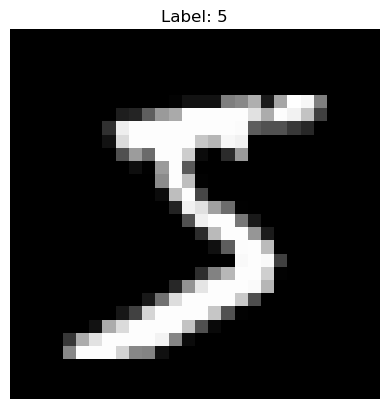

In [48]:
plt.imshow(x_train[0], cmap = 'gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')  # Hides the axes
plt.show()

In [49]:
y_train[0]

5

In [54]:
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)

In [58]:
x_train.shape[1]

784

In [64]:
model = Sequential([
    Input(shape = (x_train.shape[1],)),
    Dense(units = 20, activation = "relu"),
    Dense(units = 50, activation = "relu"),
    Dense(units = 30, activation = "relu"),
    Dense(units = len(set(y_train)), activation = "sigmoid")    
])

In [66]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 20)                  │          15,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           1,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,590 (72.62 KB)

 Trainable params: 18,590 (72.62 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam")

In [72]:
model.fit(x_train, y_train) # 1 epoch -> 1875 iterations of gradient decent

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - loss: 0.4566


In [71]:
60000 / 1875

32.0

In [73]:
model.weights

[<KerasVariable shape=(784, 20), dtype=float32, path=sequential_1/dense_4/kernel>,
 <KerasVariable shape=(20,), dtype=float32, path=sequential_1/dense_4/bias>,
 <KerasVariable shape=(20, 50), dtype=float32, path=sequential_1/dense_5/kernel>,
 <KerasVariable shape=(50,), dtype=float32, path=sequential_1/dense_5/bias>,
 <KerasVariable shape=(50, 30), dtype=float32, path=sequential_1/dense_6/kernel>,
 <KerasVariable shape=(30,), dtype=float32, path=sequential_1/dense_6/bias>,
 <KerasVariable shape=(30, 10), dtype=float32, path=sequential_1/dense_7/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_7/bias>]

In [74]:
model.layers[0]

<Dense name=dense_4, built=True>

In [76]:
model.layers[0].kernel # kernel -> weights; bias -> intercept

<KerasVariable shape=(784, 20), dtype=float32, path=sequential_1/dense_4/kernel>

In [77]:
model.evaluate(x_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - loss: 0.3601


0.36049914360046387

In [78]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.4276


0.37843576073646545

<b>epochs</b>

In [79]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - loss: 0.3475
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - loss: 0.3134
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - loss: 0.2782
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - loss: 0.2361
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - loss: 0.2227
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - loss: 0.2114
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - loss: 0.1951
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - loss: 0.1886
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - loss: 0.1727
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - loss: 0.1725


In [80]:
model.evaluate(x_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - loss: 0.1559


0.15685530006885529

In [81]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.2303


0.2052304744720459